# Credit EDA


In [1]:
# Importing the necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Reading the dataset

df=pd.read_csv('application_data.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Describing the data shape

df.shape

(307511, 122)

In [4]:
# Describing the Numerical columns
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## Data Cleaning

In [5]:
# Finding null values

df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [6]:
train_missing = (df.isnull().sum()/len(df))*100
train_missing.sort_values(ascending=False).head(60)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

##### So it is not clear from the above data how many values are missing , so we will now find those columns where missing values are more than 30 percent or more and drop them

In [7]:
df = df.loc[:,train_missing <30]

In [8]:
# Earlier there were 112 columns now there are 72 columns.
df.shape

(307511, 72)

In [9]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       

In [10]:
# We will remove unwanted columns from this dataset because most of them are Flag columns and we don't need that.

unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df.drop(labels=unwanted,axis=1,inplace=True)

In [11]:
# Removing rows having null values greater than or equal to 30%

emptyrow=df.isnull().sum(axis=1)
emptyrow=list(emptyrow[emptyrow.values>=0.3*len(df)].index)
df.drop(labels=emptyrow,axis=0,inplace=True)
print(len(emptyrow))

0


In [12]:
# Now, we see that we have only 42 columns left on which we have to do necessary operations. 

df.shape

(307511, 42)

In [13]:
# Checking the left columns

round(df.isnull().sum()/len(df.index),6).head(40)

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000039
AMT_GOODS_PRICE                0.000904
NAME_TYPE_SUITE                0.004201
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
REG_REGION_NOT_WORK_REGION     0.000000


In [14]:
round(df.isnull().sum()/len(df.index),6).tail(40)

NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000039
AMT_GOODS_PRICE                0.000904
NAME_TYPE_SUITE                0.004201
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
REG_REGION_NOT_WORK_REGION     0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_CITY_NOT_LIVE_CITY         0.000000


##### Handling amount annuity variable

In [15]:
# As we see , in the amount annuity columns missing values are very very less , so we will try to impute the values.
df.AMT_ANNUITY.isnull().sum()

12

In [16]:
# Percentage of null_values in annuity columns.
a=df.AMT_ANNUITY.isnull().sum()

float(a/len(df)*100)

0.003902299429939092

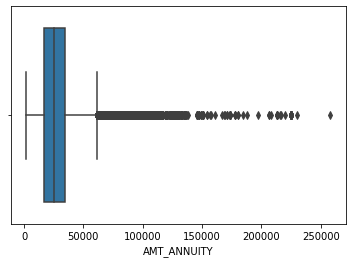

In [17]:
# Checking the outliers.

sns.boxplot(df.AMT_ANNUITY)
plt.show() 

In [18]:
# As we see in the Annuity column there are outliers so we can impute median values instead of mean values in the null_values.

df.AMT_ANNUITY=df.AMT_ANNUITY.fillna(df.AMT_ANNUITY.median())

In [19]:
# Rechecking the null values in Annnuity column.

df.AMT_ANNUITY.isnull().sum()

0

##### Handling AMT_GOODS_PRICE variable

In [20]:
# Inspection of null_values

df.AMT_GOODS_PRICE.isnull().sum()

278

In [21]:
## Percentage of null_values in AMT_GOODS_PRICE  columns.
a=df.AMT_GOODS_PRICE.isnull().sum()

float(a/len(df)*100)

0.09040327012692229

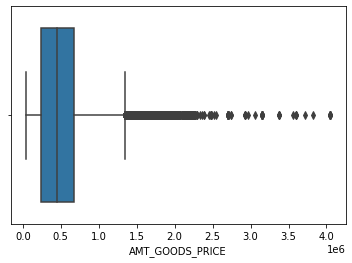

In [22]:
# Checking the outliers.

sns.boxplot(df.AMT_GOODS_PRICE)
plt.show() 

In [23]:
# As we see in the AMT_GOODS_PRICE column there are outliers so we can impute median values instead of mean values in the null_values.

df.AMT_GOODS_PRICE=df.AMT_GOODS_PRICE.fillna(df.AMT_GOODS_PRICE.median())

In [24]:
# Rechecking the null values in AMT_GOODS_PRICE column.

df.AMT_GOODS_PRICE.isnull().sum()

0

##### Handling AMT_REQ_CREDIT_BUREAU_MON variable

In [25]:
# Inspection of null_values

df.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()

41519

In [27]:
# value_counts of AMT_REQ_CREDIT_BUREAU_MON variable.

df.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [28]:
## Percentage of null_values in AMT_REQ_CREDIT_BUREAU_MON  columns.
a=df.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()

float(a/len(df)*100)

13.501630835970097

<AxesSubplot:ylabel='Frequency'>

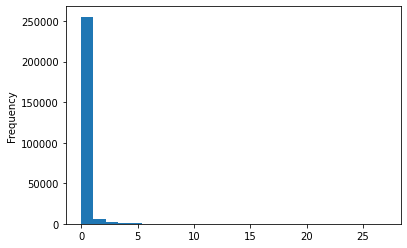

In [29]:
num_unique_values =  len(df.AMT_REQ_CREDIT_BUREAU_MON.unique())
df['AMT_REQ_CREDIT_BUREAU_MON'].plot.hist(bins = num_unique_values)

In [30]:
# As we see in the AMT_REQ_CREDIT_BUREAU_MON column the value is mostly 0 so we can impute it with median
df.AMT_REQ_CREDIT_BUREAU_MON=df.AMT_REQ_CREDIT_BUREAU_MON.fillna(df.AMT_REQ_CREDIT_BUREAU_MON.median())

In [31]:
# Rechecking the null values in AMT_REQ_CREDIT_BUREAU_MON column.

df.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()

0

##### Handling AMT_REQ_CREDIT_BUREAU_QRT variable

In [32]:
# Inspection of null_values

df.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()

41519

In [33]:
# value_counts of AMT_REQ_CREDIT_BUREAU_QRT variable.

df.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

<AxesSubplot:ylabel='Frequency'>

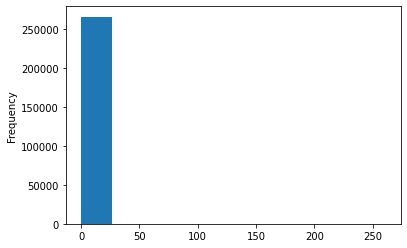

In [34]:
## Ploting histogram for AMT_REQ_CREDIT_BUREAU_QRT  columns.
df['AMT_REQ_CREDIT_BUREAU_QRT'].plot.hist()

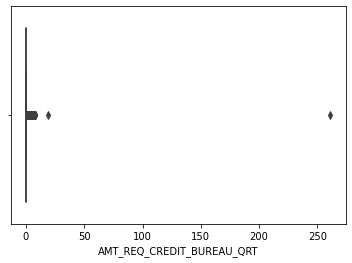

In [35]:
# Checking the outliers.

sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_QRT)
plt.show() 

In [36]:
df.AMT_REQ_CREDIT_BUREAU_QRT.mode()

0    0.0
dtype: float64

In [37]:
# As we see in the AMT_REQ_CREDIT_BUREAU_QRT column there are outliers and from the plot we get that values mostly are descrete, we can impute the value with mode or median.

df.AMT_REQ_CREDIT_BUREAU_QRT=df.AMT_REQ_CREDIT_BUREAU_QRT.fillna(df.AMT_REQ_CREDIT_BUREAU_QRT.median())

In [38]:
# Rechecking the null values in AMT_REQ_CREDIT_BUREAU_QRT column.

df.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()

0

##### Handling AMT_REQ_CREDIT_BUREAU_YEAR variable

In [39]:
# Inspection of null_values

df.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

41519

In [40]:
# value_counts of AMT_REQ_CREDIT_BUREAU_YEAR variable.

df.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [41]:
## Percentage of null_values in AMT_REQ_CREDIT_BUREAU_YEAR  columns.
a=df.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

float(a/len(df)*100)

13.501630835970097

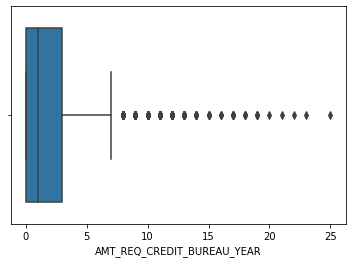

In [42]:
# Checking the outliers.

sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_YEAR)
plt.show() 

<AxesSubplot:ylabel='Frequency'>

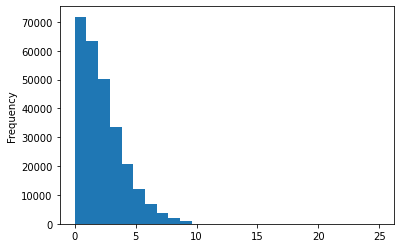

In [43]:
num_unique_values =len(df.AMT_REQ_CREDIT_BUREAU_YEAR.unique())
df.AMT_REQ_CREDIT_BUREAU_YEAR.plot.hist(bins = num_unique_values)

In [44]:
df.AMT_REQ_CREDIT_BUREAU_YEAR.median()

1.0

In [45]:
# As we see in the AMT_REQ_CREDIT_BUREAU_YEAR column there are outliers so we can impute median values instead of mean values in the null_values.

df.AMT_REQ_CREDIT_BUREAU_YEAR=df.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(df.AMT_REQ_CREDIT_BUREAU_YEAR.median())

In [46]:
# Rechecking the null values in AMT_REQ_CREDIT_BUREAU_YEAR column.

df.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

0

### AMT_REQ_CREDIT_BUREAU_HOUR

In [47]:
df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

<AxesSubplot:ylabel='Frequency'>

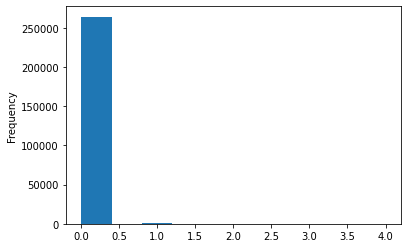

In [48]:
num_unique_values =len(df.AMT_REQ_CREDIT_BUREAU_HOUR.unique())
df.AMT_REQ_CREDIT_BUREAU_HOUR.plot.hist()

<AxesSubplot:xlabel='AMT_REQ_CREDIT_BUREAU_HOUR'>

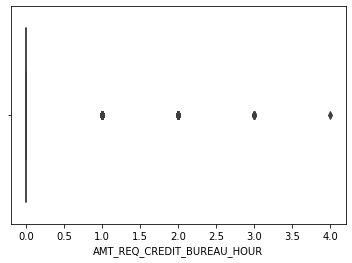

In [49]:
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_HOUR)

In [50]:
df.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum()

41519

In [51]:
(df.isnull().sum()/len(df))*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.000000
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_W

In [52]:
### NAME_TYPE_SUITE 

In [53]:
df.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Unaccompanied'),
  Text(1, 0, 'Family'),
  Text(2, 0, 'Spouse, partner'),
  Text(3, 0, 'Children'),
  Text(4, 0, 'Other_A'),
  Text(5, 0, 'Other_B'),
  Text(6, 0, 'Group of people')])

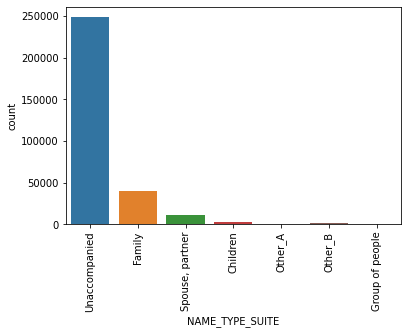

In [54]:
sns.countplot(x= 'NAME_TYPE_SUITE', data = df)
plt.xticks(rotation=90)

we can ignore this column 

In [55]:
df.NAME_TYPE_SUITE.mode()

0    Unaccompanied
dtype: object

##### All the Null_values are Tackled.

### Manipulating the DAYS_BIRTH column

In [56]:
df['DAYS_BIRTH'].head()

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

In [57]:
# Converting the days_birth column into from days to years and removing the negative sign

df['DAYS_BIRTH'] = -round(df['DAYS_BIRTH']/365,0)
df['DAYS_BIRTH'].head()



0    26.0
1    46.0
2    52.0
3    52.0
4    55.0
Name: DAYS_BIRTH, dtype: float64

In [58]:
# Doing the same step as above for DAYS_REGISTRATION variable
df['DAYS_REGISTRATION'] = -round(df['DAYS_REGISTRATION']/365,0)
df['DAYS_REGISTRATION'].head()




0    10.0
1     3.0
2    12.0
3    27.0
4    12.0
Name: DAYS_REGISTRATION, dtype: float64

In [59]:
# Doing the same step as above for DAYS_ID_PUBLISH variable
df['DAYS_ID_PUBLISH'] = -round(df['DAYS_ID_PUBLISH']/365,0)
df['DAYS_ID_PUBLISH'].head()



0    6.0
1    1.0
2    7.0
3    7.0
4    9.0
Name: DAYS_ID_PUBLISH, dtype: float64

In [60]:
# CHECKING THE DATATYPES 
df.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                     float64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGION       int64
LIVE_REGION_NOT_WORK_REGI

### TARGET VARIABLE

In [61]:
df['TARGET'].count()

307511

In [62]:
(df['TARGET']==1).sum()

24825

In [63]:
(df['TARGET']==0).sum()

282686

In [64]:
# Checking for imbalance and calculating the ratio

(df['TARGET']==0).sum()/(df['TARGET']==1).sum()



11.387150050352467

We can see that there is too much data imbalance. Therefore we will seperate the target variable in our EDA

### Analysing the categorical data 

Since there are two values in our target variable and there is imblance, we will seperate the df data frame into df_0 with target value as 0 and df_1 with target value as 1

In [65]:
df_0 = df.loc[df['TARGET']==0]
df_1 = df.loc[df['TARGET']==1]

We will be using 3 different plots for analysis
Pie Plot: for plotting the all the values present for a particular variable
count plot1: This plot consist the count of different categories, and we know that target =0 will be higher count than target =1
count plot2: We divide the dataset into two subset target =0 and target =1 and then divide it further into different categories and plot them in percentage terms    

We will be using loops for this

    
    
    

In [120]:
def plotting(df, df_0,df_1,column):
    df = df
    df_0 = df_0
    df_1=df_1
    col = column
    
    fig = plt.figure(figsize = (13,8))
    
    ax1 = plt.subplot(221)
    df[col].value_counts().plot.pie(autopct = "%1.0f%%",ax=ax1)
    plt.title("Plotting data for the column:" + column)
    
    ax2= plt.subplot(222)
    sns.countplot(x=column,hue='TARGET',data = df,ax=ax2)
    plt.xticks(rotation = 90)
    plt.title('Plotting data for target in terms of total count')
    
    
    ax3= plt.subplot(223)
    dt = pd.DataFrame()
    dt['0'] = ((df_0[col].value_counts())/len(df_0))
    dt['1'] = ((df_1[col].value_counts())/len(df_1))
    dt.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')
    
    plt.tight_layout()
    plt.show()
    

In [121]:
df_categorical = df.select_dtypes(include=['object']).columns

In [122]:
df_categorical

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'amt_annuity_categorical'],
      dtype='object')

### Performing the univariate analysis of the categorical data



Plots of:  NAME_CONTRACT_TYPE


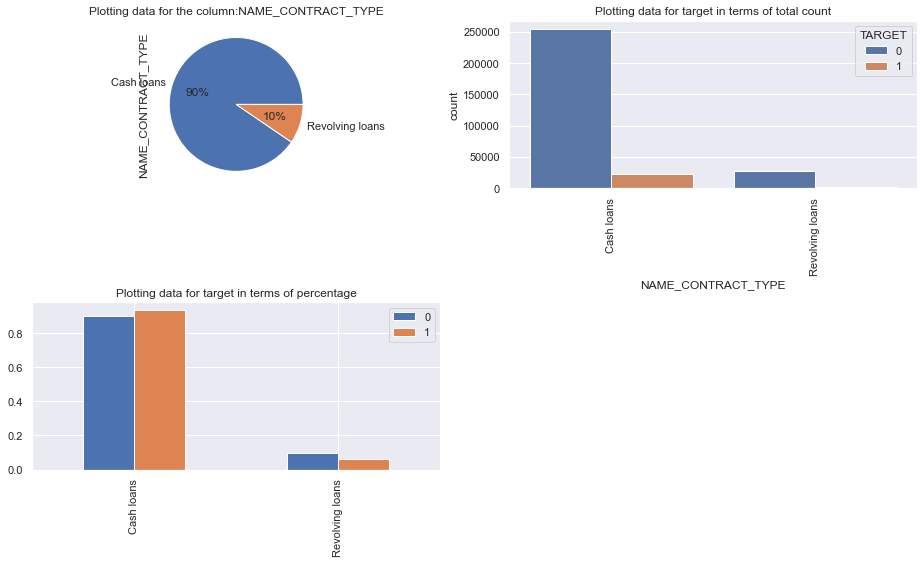

----------next plot---------------------------
Plots of:  CODE_GENDER


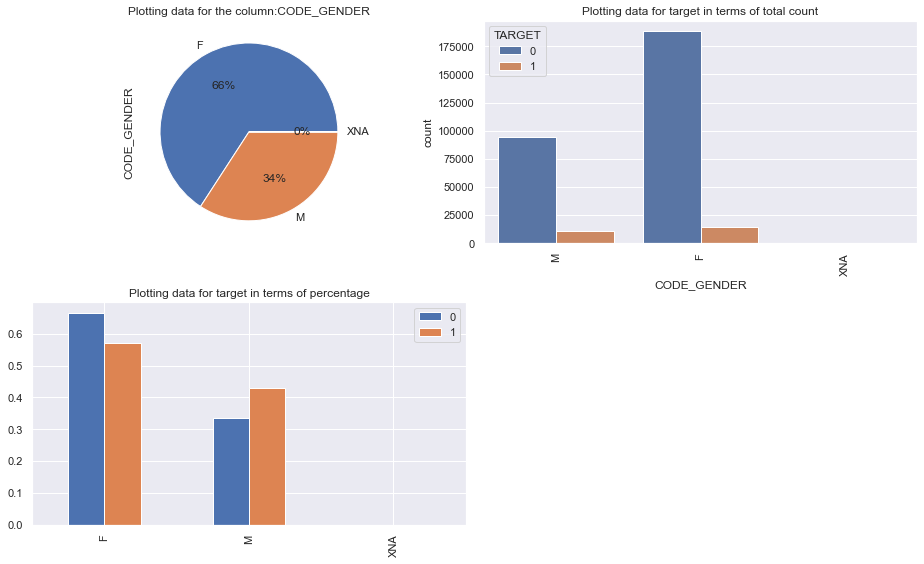

----------next plot---------------------------
Plots of:  FLAG_OWN_CAR


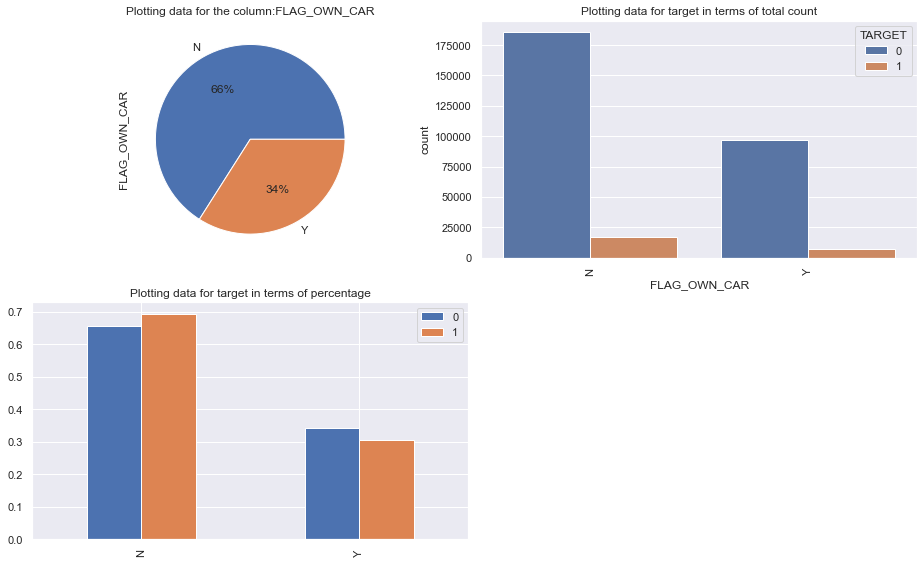

----------next plot---------------------------
Plots of:  FLAG_OWN_REALTY


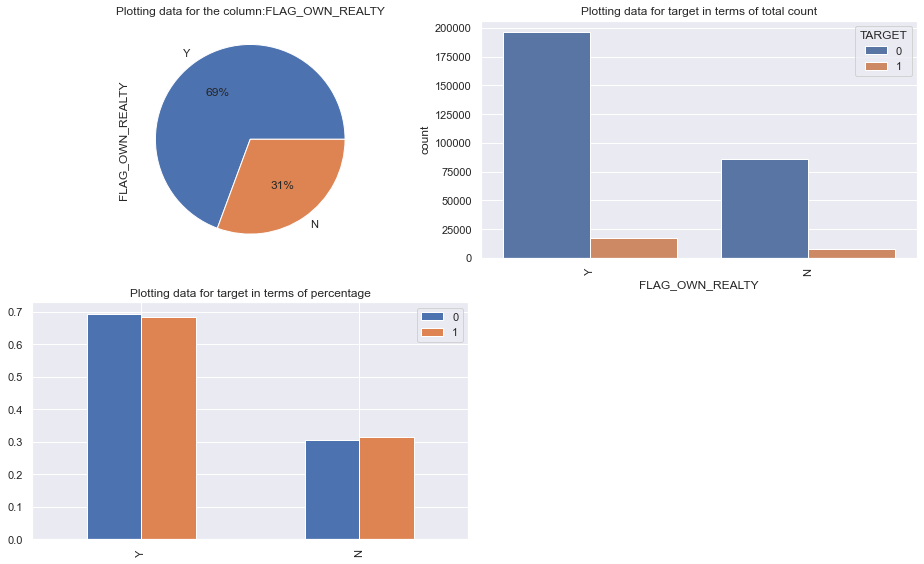

----------next plot---------------------------
Plots of:  NAME_TYPE_SUITE


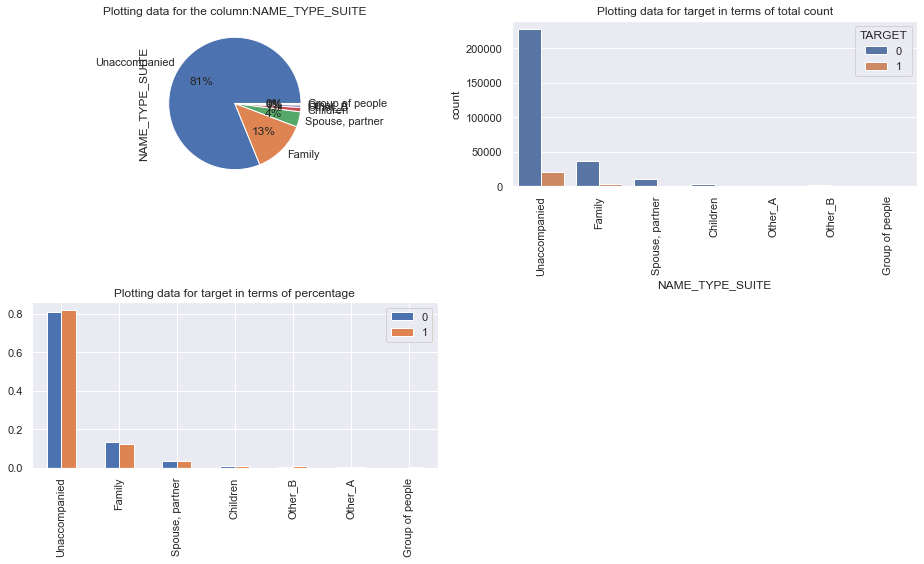

----------next plot---------------------------
Plots of:  NAME_INCOME_TYPE


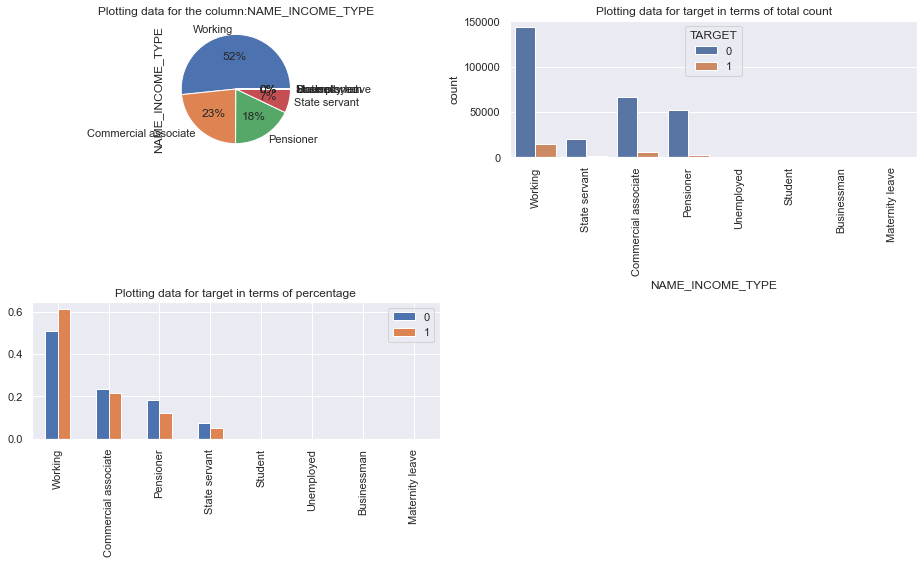

----------next plot---------------------------
Plots of:  NAME_EDUCATION_TYPE


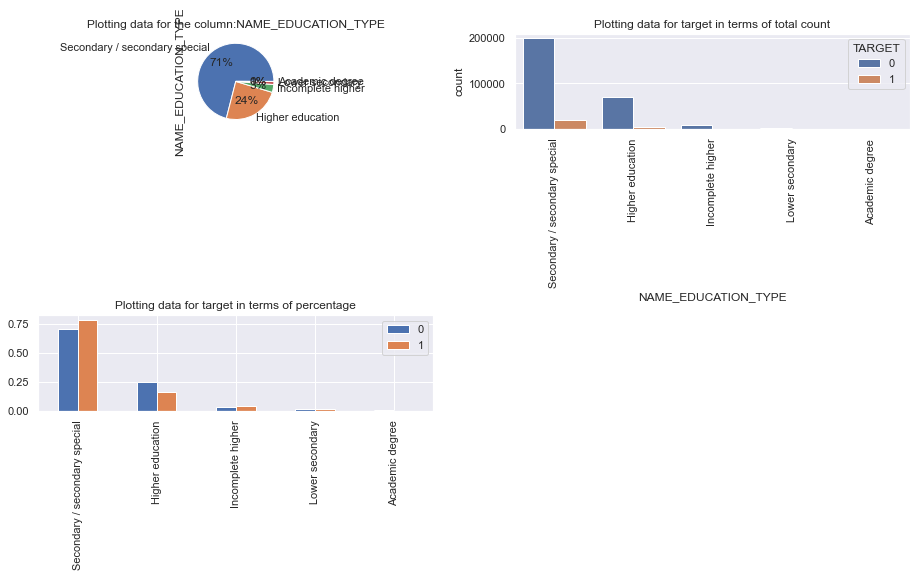

----------next plot---------------------------
Plots of:  NAME_FAMILY_STATUS


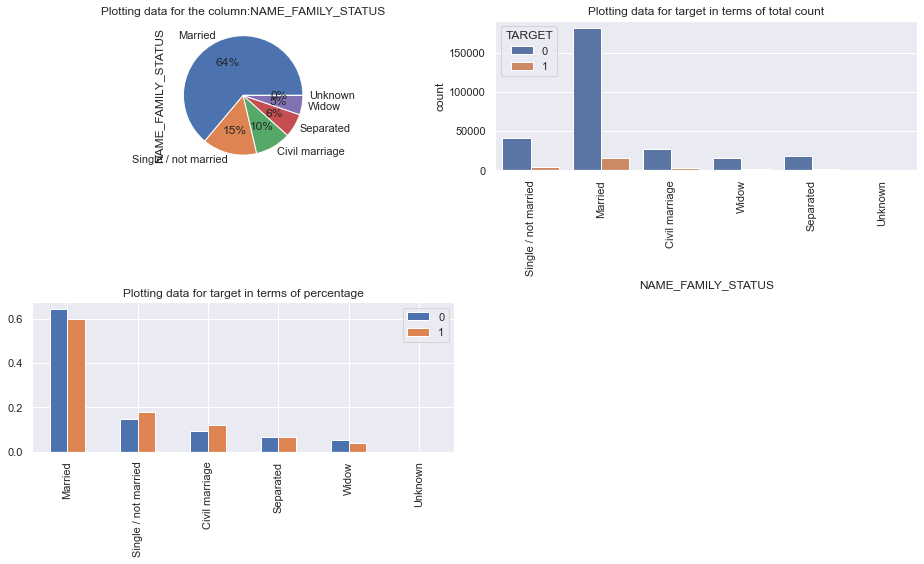

----------next plot---------------------------
Plots of:  NAME_HOUSING_TYPE


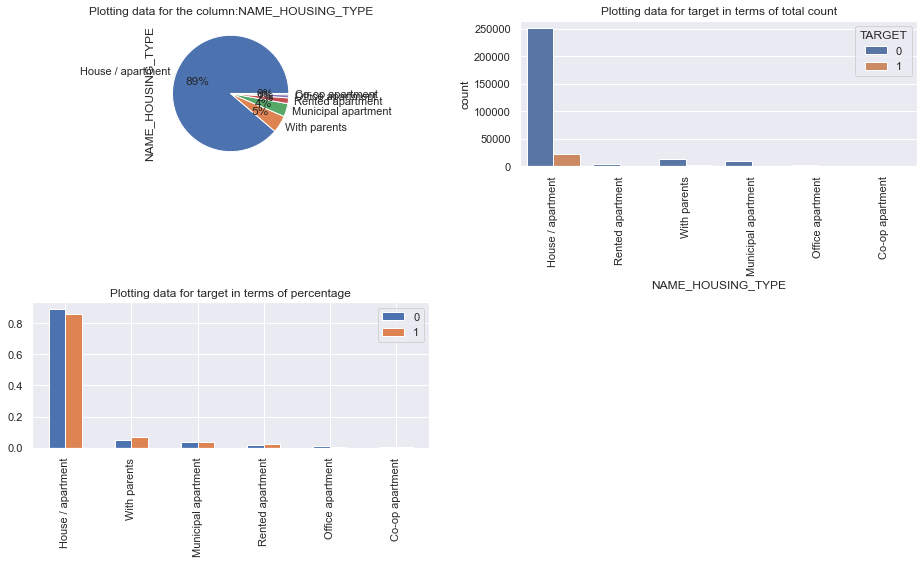

----------next plot---------------------------
Plots of:  WEEKDAY_APPR_PROCESS_START


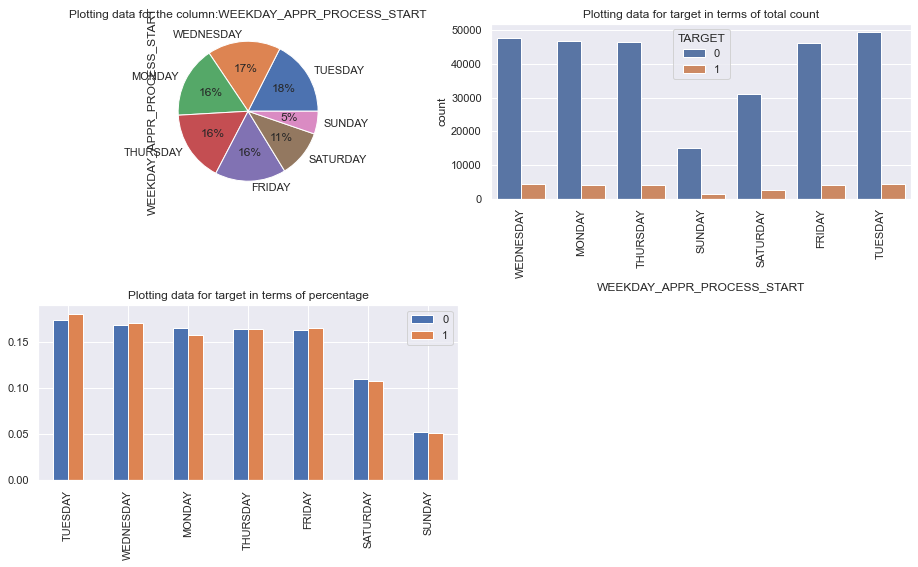

----------next plot---------------------------
Plots of:  ORGANIZATION_TYPE


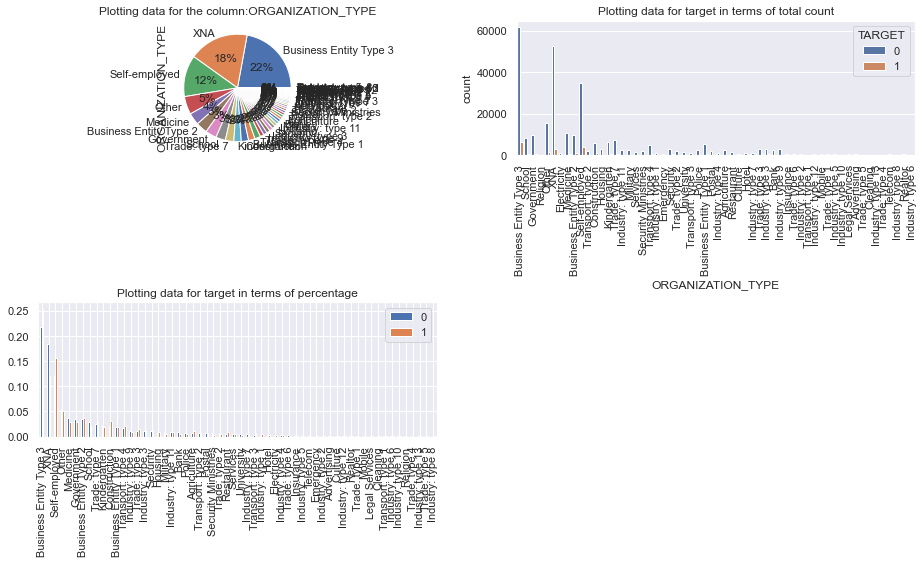

----------next plot---------------------------
Plots of:  amt_annuity_categorical


KeyError: 'amt_annuity_categorical'

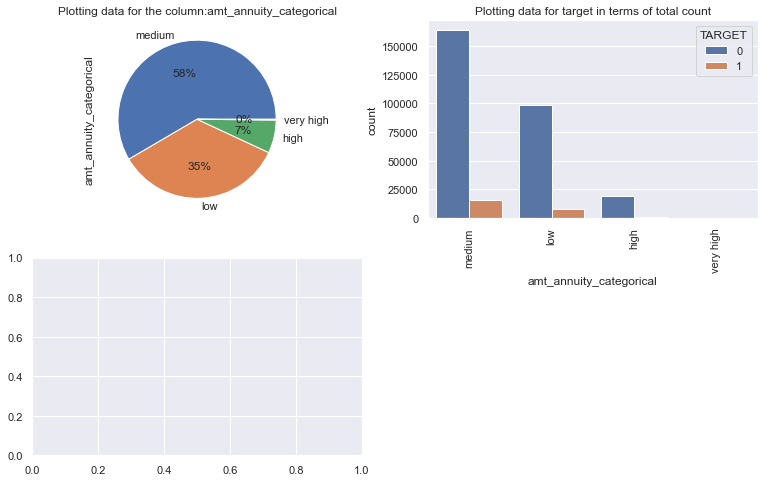

In [123]:
### Performing the univariate analysis of the categorical data

for column in df_categorical:
    print("Plots of: ",column)
    plotting(df,df_0,df_1,column)
    print('----------next plot---------------------------')


The variable which might be important and some inference from the above plots are :
- CODE_GENDER:Female took more loans as compared to the male, however the defualters are higher in case of males
- NAME_INCOME_TYPE: Working class takes the more loan and pensioner defaulter is lower than non defaulter
- NAME_EDUCATION_TYPE: Most client took loan for secondary education followed by higher education. Defaulter are much higher secondary education and for higher education the default rate is low
- NAME_HOUSING_TYPE: Most client that takes the loan are living in House/Apartment takes however the default rate is also high for this category     
- NAME_FAMILY_TYPE: Most client that apply for the loan are married and most of them are not defaulters, however single/not married are more defaulter    

### Numerical Columns

### Non- defaulter correlation

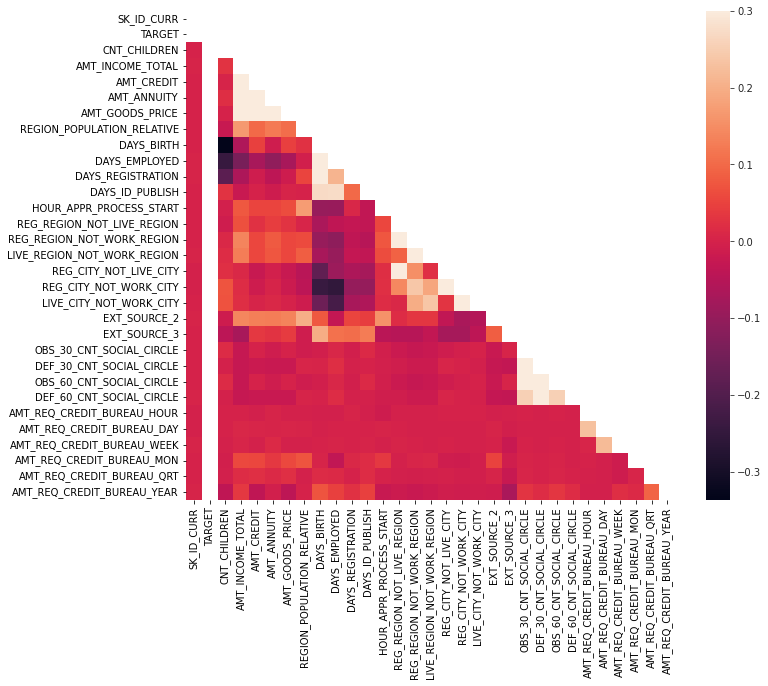

In [70]:
corr = df_0.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
f, ax = plt.subplots(figsize=(11,9))
with sns.axes_style('white'):
    ax = sns.heatmap(corr,mask=mask,vmax=.3,square = True)

### Finding the top 10 correlation

In [71]:
corr_0 = df_0.corr().abs()
corr_0 = corr_0.unstack().sort_values(kind="quicksort")
corr_0 = corr_0.dropna()
corr_0 = corr_0[corr_0!=1.0]

print(corr_0)

DAYS_REGISTRATION           AMT_REQ_CREDIT_BUREAU_DAY      0.000031
AMT_REQ_CREDIT_BUREAU_DAY   DAYS_REGISTRATION              0.000031
SK_ID_CURR                  AMT_REQ_CREDIT_BUREAU_MON      0.000037
AMT_REQ_CREDIT_BUREAU_MON   SK_ID_CURR                     0.000037
AMT_ANNUITY                 SK_ID_CURR                     0.000071
                                                             ...   
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.861861
AMT_CREDIT                  AMT_GOODS_PRICE                0.987022
AMT_GOODS_PRICE             AMT_CREDIT                     0.987022
OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE       0.998508
OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE       0.998508
Length: 870, dtype: float64


We can use below code to remove the duplicates and find the top 10 correlation. Note the head is 12 because there is one self correlation variable SK_ID_CURR and AMT_CREDIT

In [72]:
df_0.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(12)

SK_ID_CURR                  SK_ID_CURR                     1.000000
OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE       0.998508
AMT_CREDIT                  AMT_GOODS_PRICE                0.987022
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.861861
DEF_30_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE       0.859332
REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY        0.830381
AMT_ANNUITY                 AMT_GOODS_PRICE                0.776421
                            AMT_CREDIT                     0.771297
DAYS_EMPLOYED               DAYS_BIRTH                     0.617761
REG_REGION_NOT_WORK_REGION  REG_REGION_NOT_LIVE_REGION     0.446101
REG_CITY_NOT_WORK_CITY      REG_CITY_NOT_LIVE_CITY         0.435514
AMT_INCOME_TOTAL            AMT_ANNUITY                    0.418948
dtype: float64

### Top 10 correlation in non defaulters are : 
- OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE       0.998508
- AMT_CREDIT                  AMT_GOODS_PRICE                0.987022
- REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.861861
- DEF_30_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE       0.859332
- REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY        0.830381
- AMT_ANNUITY                 AMT_GOODS_PRICE                0.776421
- DAYS_EMPLOYED               DAYS_BIRTH                     0.617761
- REG_REGION_NOT_WORK_REGION  REG_REGION_NOT_LIVE_REGION     0.446101
- REG_CITY_NOT_WORK_CITY      REG_CITY_NOT_LIVE_CITY         0.435514
- AMT_INCOME_TOTAL            AMT_ANNUITY                    0.418948


### Defualter Correlation

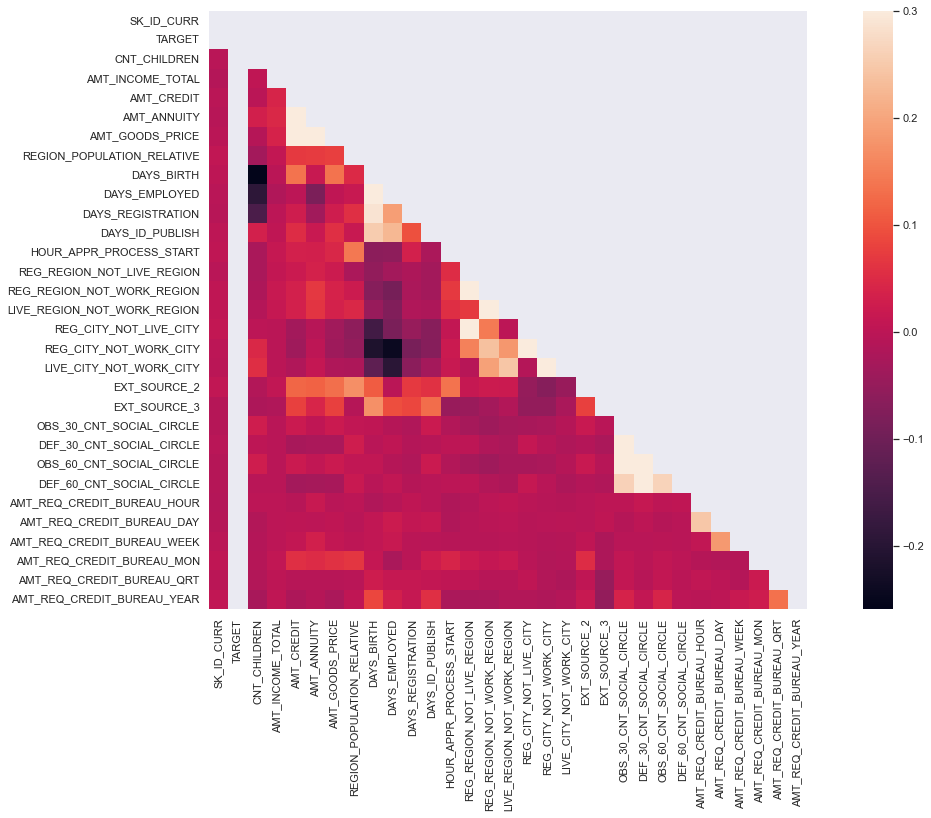

In [113]:
corr = df_1.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
f, ax = plt.subplots(figsize=(20,11))
with sns.axes_style('white'):
    ax = sns.heatmap(corr,mask=mask,vmax=.3,square = True)

In [74]:
corr_1 = df_1.corr().abs()
corr_1 = corr_1.unstack().sort_values(kind="quicksort")
corr_1 = corr_1.dropna()
corr_1 = corr_1[corr_1!=1.0]

print(corr_1)

LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY         0.000011
REG_CITY_NOT_LIVE_CITY       LIVE_REGION_NOT_WORK_REGION    0.000011
AMT_INCOME_TOTAL             AMT_REQ_CREDIT_BUREAU_WEEK     0.000018
AMT_REQ_CREDIT_BUREAU_WEEK   AMT_INCOME_TOTAL               0.000018
DAYS_REGISTRATION            AMT_INCOME_TOTAL               0.000144
                                                              ...   
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.868994
AMT_CREDIT                   AMT_GOODS_PRICE                0.982783
AMT_GOODS_PRICE              AMT_CREDIT                     0.982783
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998269
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998269
Length: 870, dtype: float64


In [75]:
df_1.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(12)

SK_ID_CURR                   SK_ID_CURR                    1.000000
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE      0.998269
AMT_CREDIT                   AMT_GOODS_PRICE               0.982783
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.868994
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.847885
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.778540
AMT_GOODS_PRICE              AMT_ANNUITY                   0.752295
AMT_CREDIT                   AMT_ANNUITY                   0.752195
DAYS_EMPLOYED                DAYS_BIRTH                    0.574681
REG_REGION_NOT_WORK_REGION   REG_REGION_NOT_LIVE_REGION    0.497937
REG_CITY_NOT_WORK_CITY       REG_CITY_NOT_LIVE_CITY        0.472052
DEF_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE      0.337181
dtype: float64

### Top 10 correlation in defaulters are :
- OBS_30_CNT_SOCIAL_CIRCLE         OBS_60_CNT_SOCIAL_CIRCLE      0.998269
- AMT_CREDIT                       AMT_GOODS_PRICE               0.982783
- DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.868994
- LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.847885
- REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.778540
- AMT_GOODS_PRICE              AMT_ANNUITY                   0.752295
- AMT_CREDIT                   AMT_ANNUITY                   0.752195
- DAYS_EMPLOYED                DAYS_BIRTH                    0.574681
- REG_REGION_NOT_WORK_REGION   REG_REGION_NOT_LIVE_REGION    0.497937
- REG_CITY_NOT_WORK_CITY       REG_CITY_NOT_LIVE_CITY        0.472052

### Analysis for outliers

In [76]:
df_numerical = df.select_dtypes(include = ['int64','float']).columns

Now as done earlier in case of categorical value, we will create a loop for getting the plots

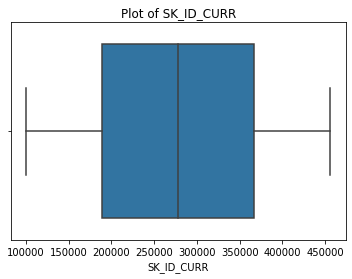

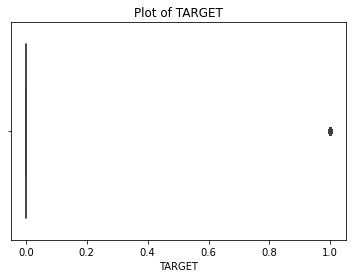

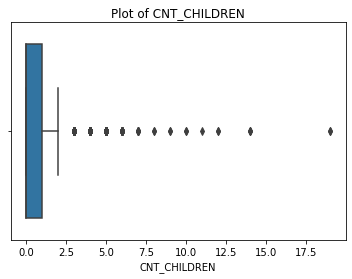

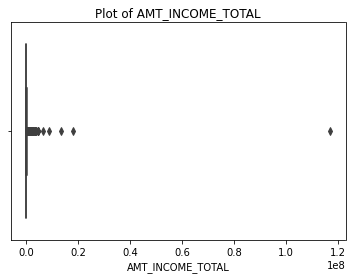

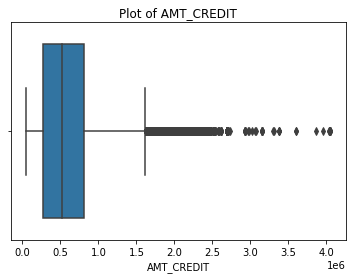

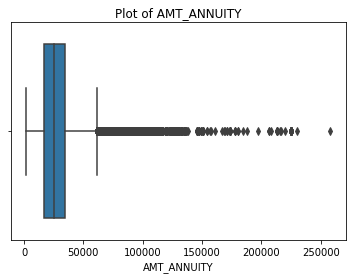

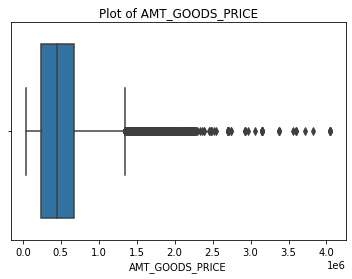

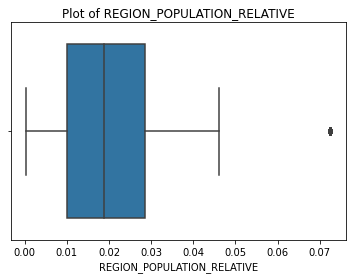

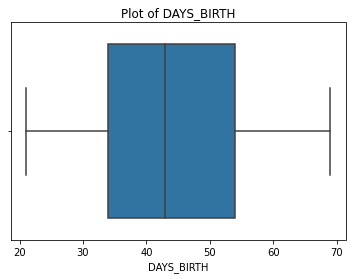

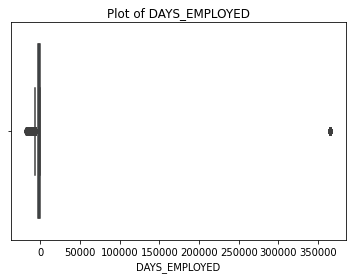

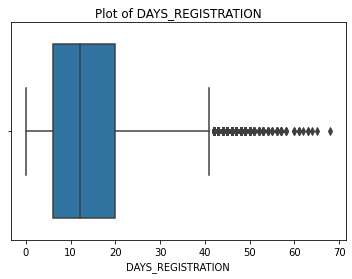

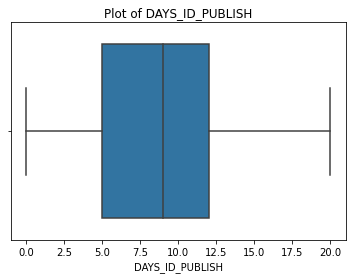

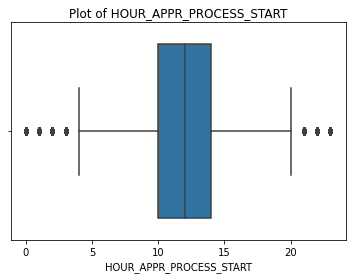

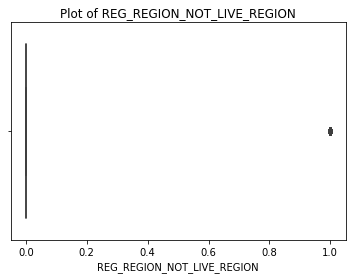

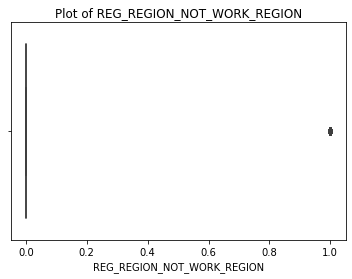

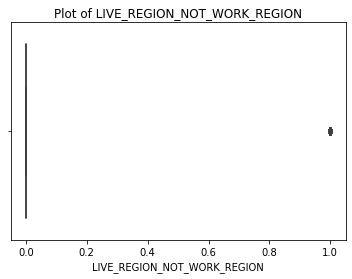

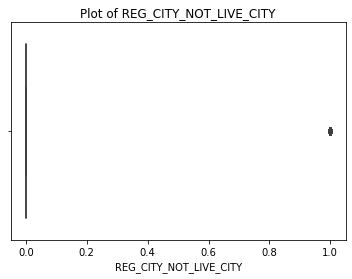

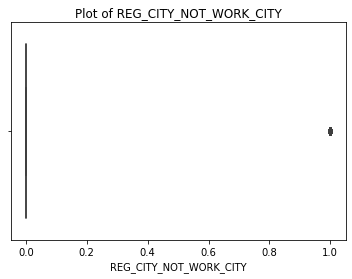

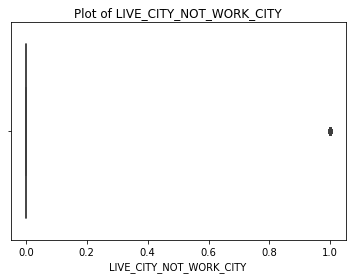

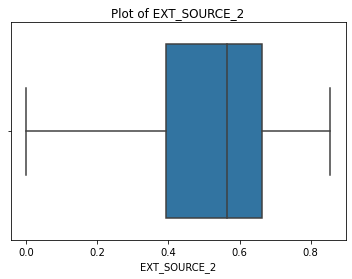

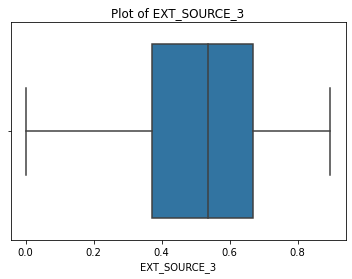

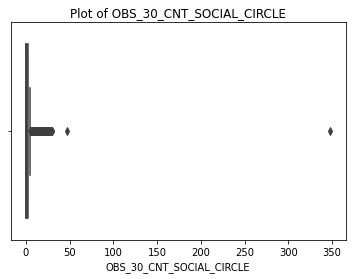

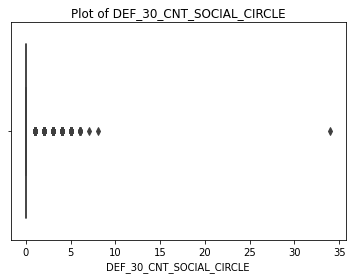

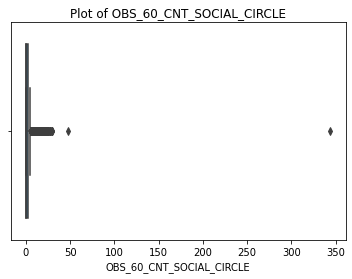

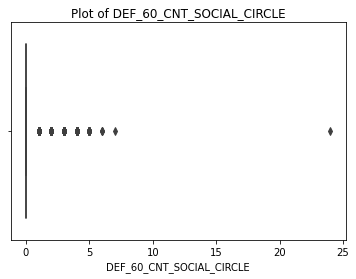

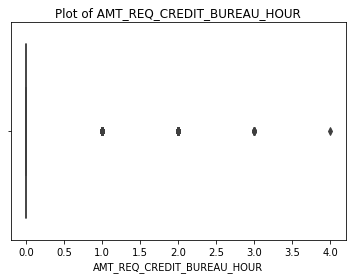

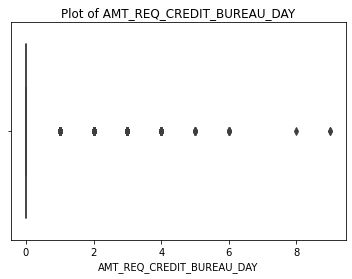

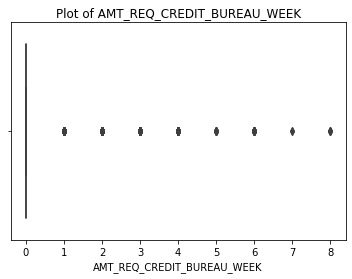

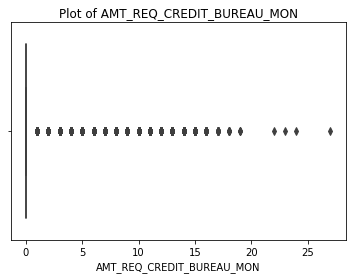

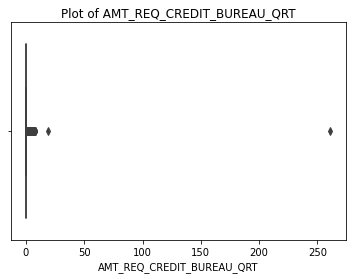

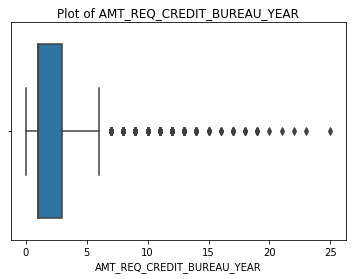

In [77]:
for column in df_numerical:
    title = "Plot of "+ column
    sns.boxplot(df[column])
    plt.title(title)
    plt.show()

From these boxplots we can conclude that there are some outliers in the data set few them are: 
- CNT_CHILDREN : We can see that some of the clients have value for this variable more than 10 which can be extreme
- AMT_INCOME_TOTAL: We can see that there is an extreme value in total income 1.2 1e8 and this can be removed


## converting the some numerical data into categorical for analysis

<AxesSubplot:xlabel='AMT_ANNUITY', ylabel='Density'>

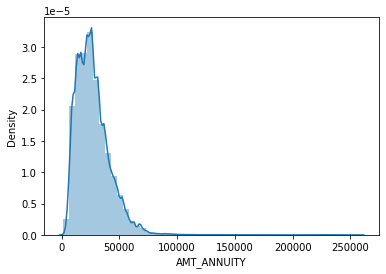

In [78]:
sns.distplot(df['AMT_ANNUITY'].dropna())

In [79]:
def amt_annuity(x):
    if x <= 20000:
        return 'low'
    elif x > 20000 and x <=50000:
        return 'medium'
    elif x > 50000 and x <=100000:
        return 'high'
    else:
        return 'very high'

df['amt_annuity_categorical'] = df['AMT_ANNUITY'].apply(lambda x: amt_annuity(x))

<AxesSubplot:xlabel='amt_annuity_categorical', ylabel='count'>

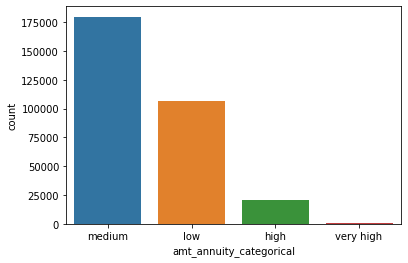

In [80]:
sns.countplot(x= 'amt_annuity_categorical', data = df)

### Univariate analysis of numerical data

For this we will plot histogram and distribution plots

Plot of SK_ID_CURR


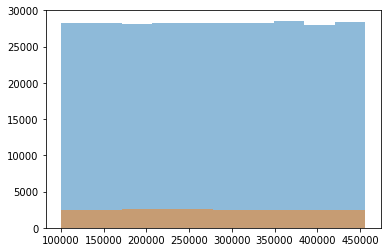

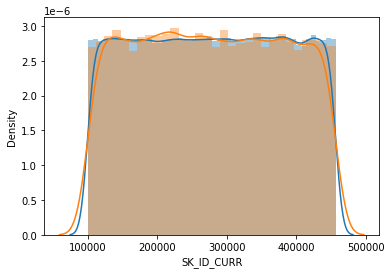

-------------------------------------------------
Plot of TARGET


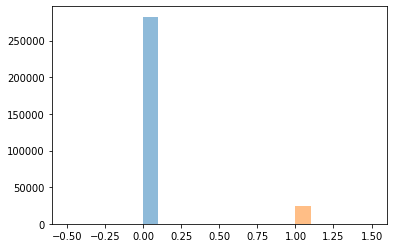

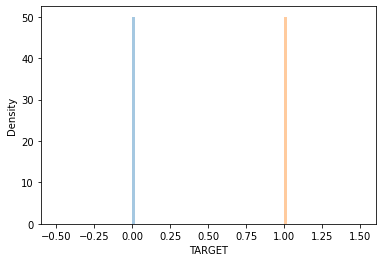

-------------------------------------------------
Plot of CNT_CHILDREN


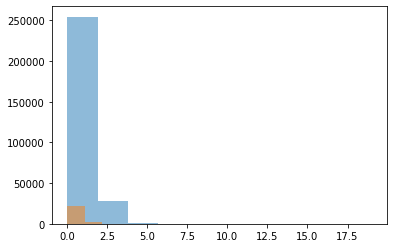

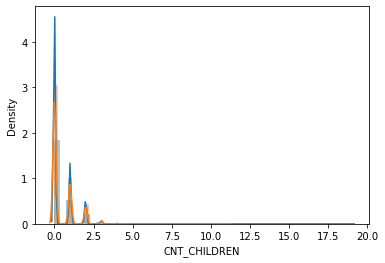

-------------------------------------------------
Plot of AMT_INCOME_TOTAL


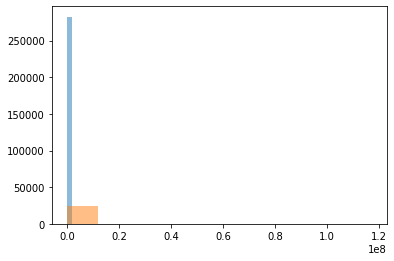

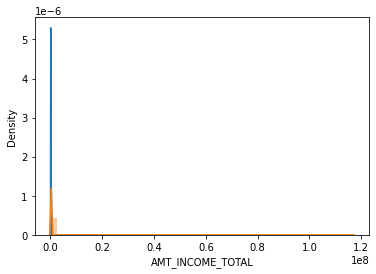

-------------------------------------------------
Plot of AMT_CREDIT


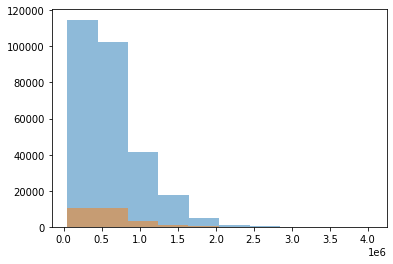

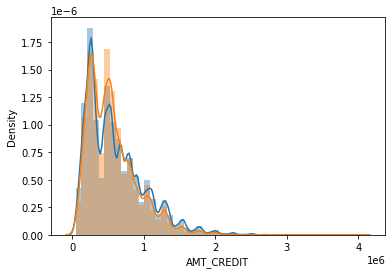

-------------------------------------------------
Plot of AMT_ANNUITY


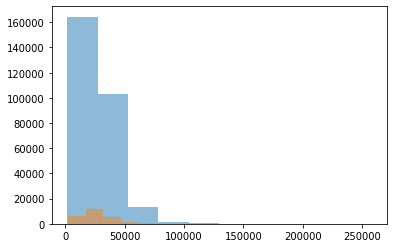

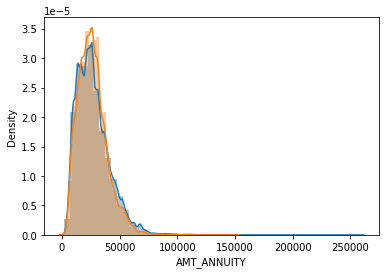

-------------------------------------------------
Plot of AMT_GOODS_PRICE


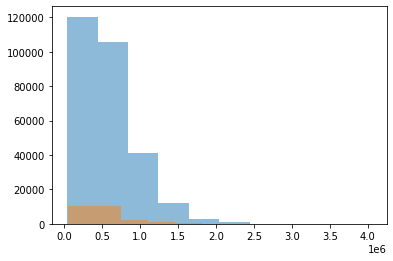

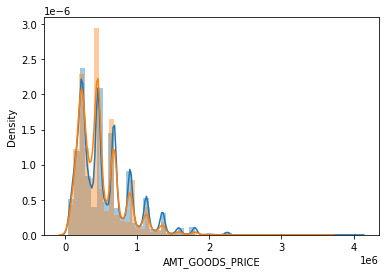

-------------------------------------------------
Plot of REGION_POPULATION_RELATIVE


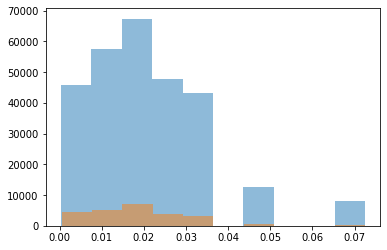

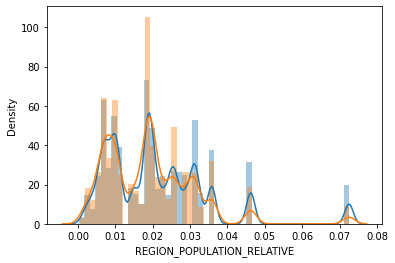

-------------------------------------------------
Plot of DAYS_BIRTH


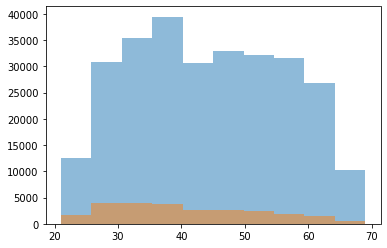

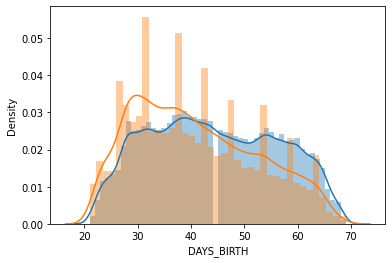

-------------------------------------------------
Plot of DAYS_EMPLOYED


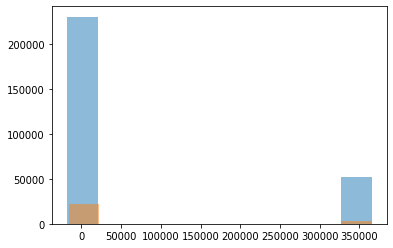

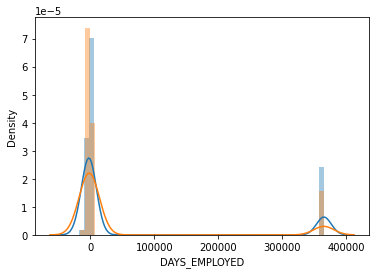

-------------------------------------------------
Plot of DAYS_REGISTRATION


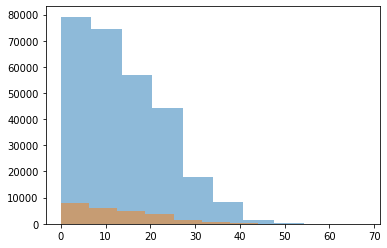

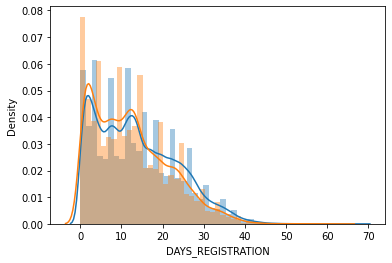

-------------------------------------------------
Plot of DAYS_ID_PUBLISH


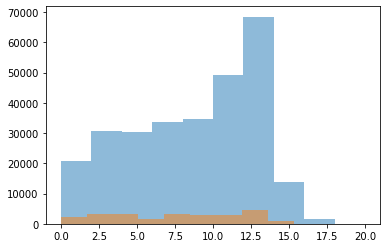

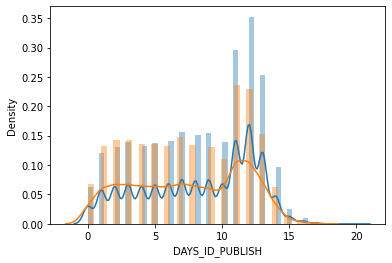

-------------------------------------------------
Plot of HOUR_APPR_PROCESS_START


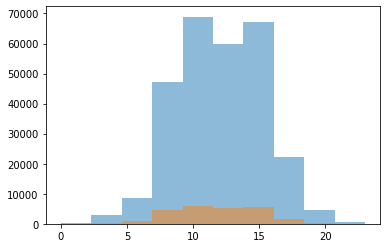

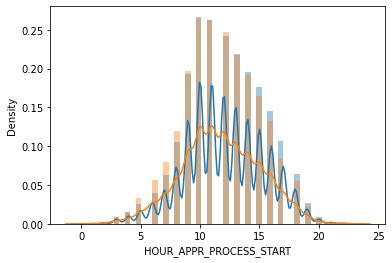

-------------------------------------------------
Plot of REG_REGION_NOT_LIVE_REGION


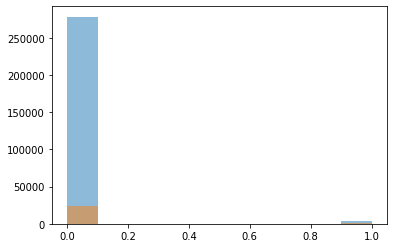

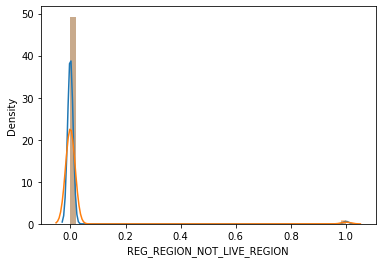

-------------------------------------------------
Plot of REG_REGION_NOT_WORK_REGION


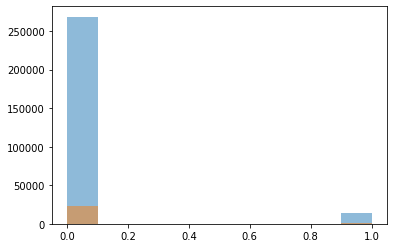

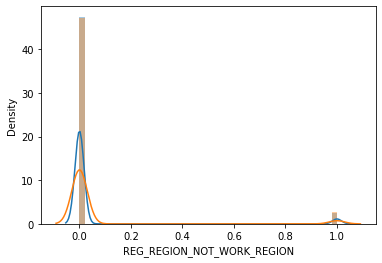

-------------------------------------------------
Plot of LIVE_REGION_NOT_WORK_REGION


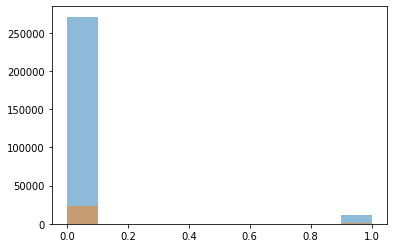

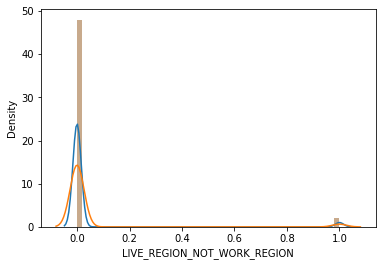

-------------------------------------------------
Plot of REG_CITY_NOT_LIVE_CITY


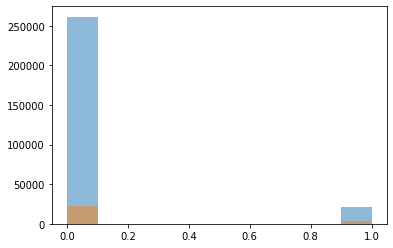

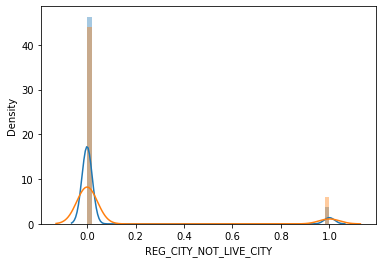

-------------------------------------------------
Plot of REG_CITY_NOT_WORK_CITY


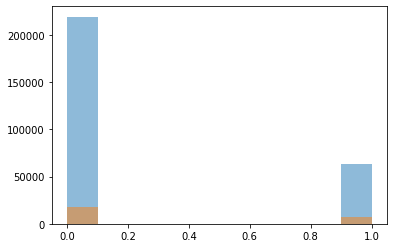

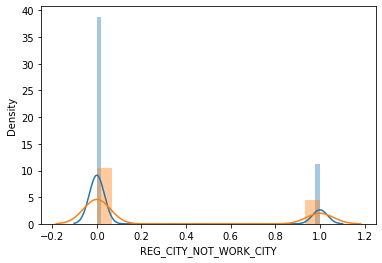

-------------------------------------------------
Plot of LIVE_CITY_NOT_WORK_CITY


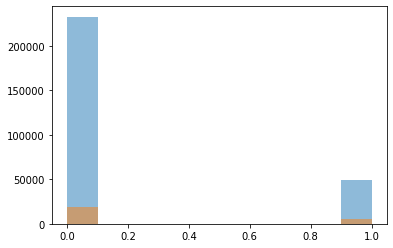

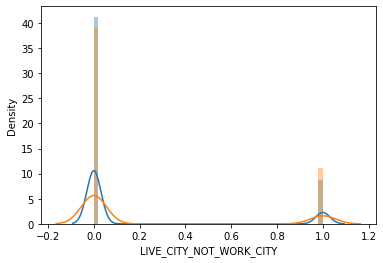

-------------------------------------------------
Plot of EXT_SOURCE_2


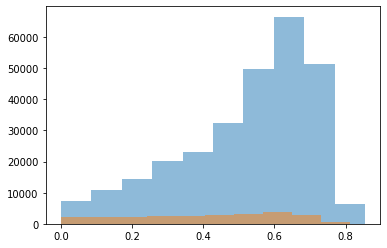

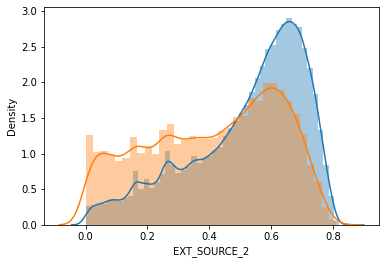

-------------------------------------------------
Plot of EXT_SOURCE_3


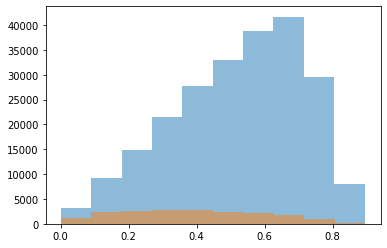

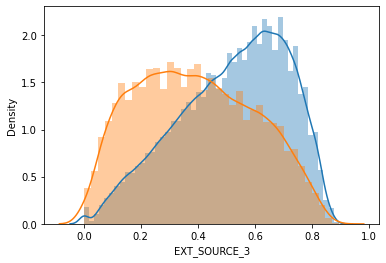

-------------------------------------------------
Plot of OBS_30_CNT_SOCIAL_CIRCLE


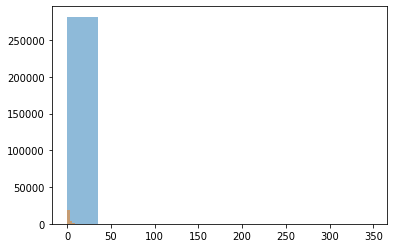

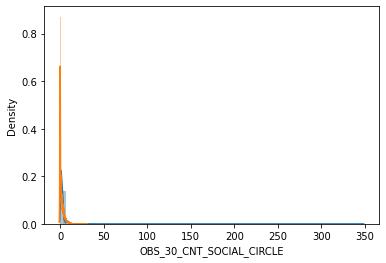

-------------------------------------------------
Plot of DEF_30_CNT_SOCIAL_CIRCLE


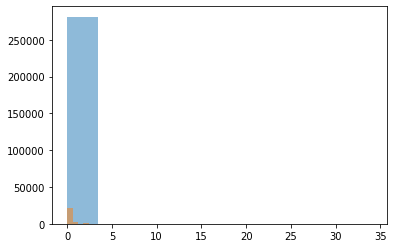

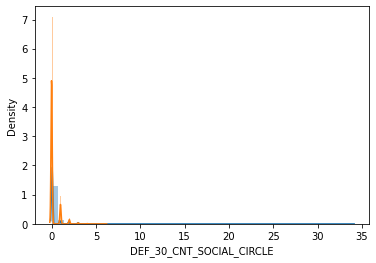

-------------------------------------------------
Plot of OBS_60_CNT_SOCIAL_CIRCLE


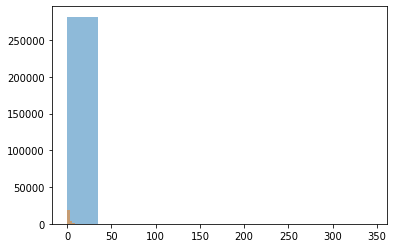

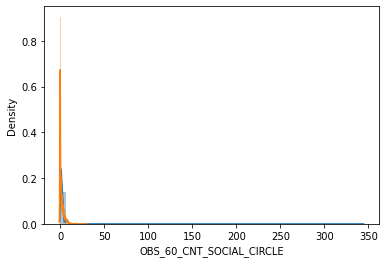

-------------------------------------------------
Plot of DEF_60_CNT_SOCIAL_CIRCLE


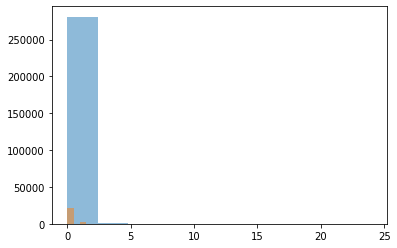

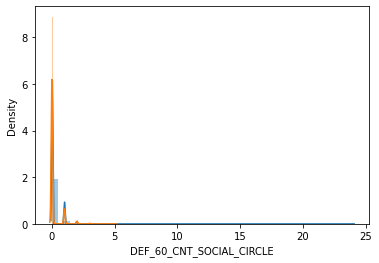

-------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_HOUR


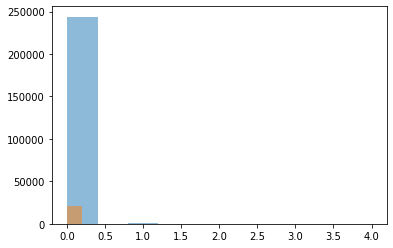

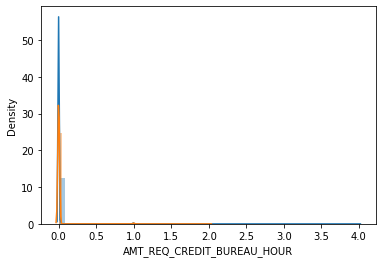

-------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_DAY


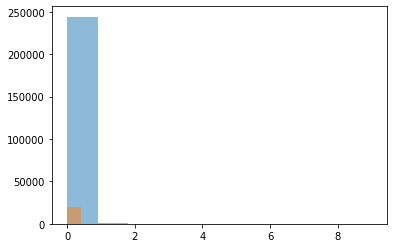

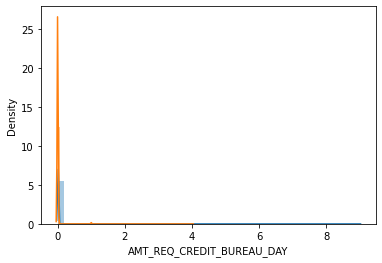

-------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_WEEK


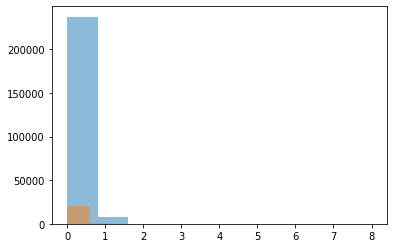

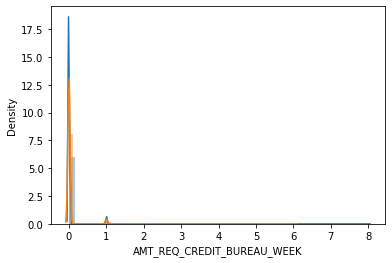

-------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_MON


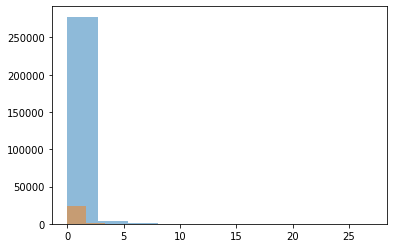

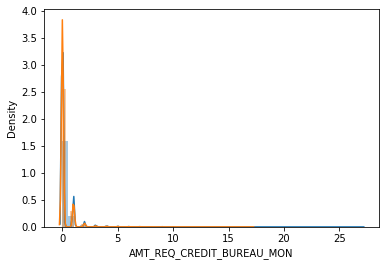

-------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_QRT


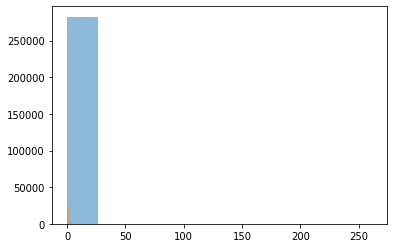

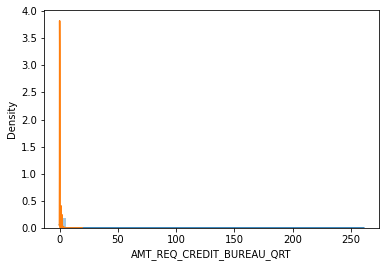

-------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_YEAR


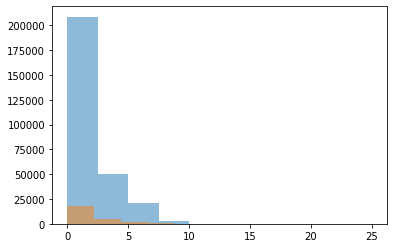

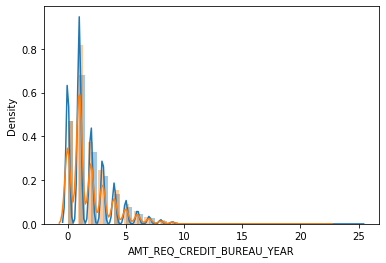

-------------------------------------------------


In [81]:
for column in df_numerical:
    title = "Plot of " + column
    print(title)
    plt.hist(df_0[column],alpha =.5, label = '0')
    plt.hist(df_1[column],alpha =.5, label = '1')
    plt.show()
    
    sns.distplot(df_0[column].dropna(),label = '0')
    sns.distplot(df_1[column].dropna(),label = '1')
    
    plt.show()
    
    print('-------------------------------------------------')

### These plots suggest that columns where the plots are different for the target =0 and target =1 are :
- AMT_CREDIT
- AMT_ANNUITY
- AMT_GOODS_PRICE
- DAYS_BIRTH
- DAYS_EMPLOYED
- DAYS_REGISTRATION
- EXT SOURCE_3

we can also see that there are many other columns that are different

### Reading previous application data

In [82]:
prev_application = pd.read_csv('previous_application.csv')
prev_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# inspecting the shape of the dataset
prev_application.shape

(1670214, 37)

In [84]:
#checking of duplicates wqith 'SK_ID_CURR' as person can have mulitple loan
prev_application.SK_ID_CURR.value_counts()

187868    77
265681    73
173680    72
242412    68
206783    67
          ..
135285     1
311960     1
427136     1
241434     1
191629     1
Name: SK_ID_CURR, Length: 338857, dtype: int64

In [85]:
prev_application.SK_ID_PREV.value_counts()

2030495    1
1035848    1
1526498    1
2148893    1
2437429    1
          ..
2811649    1
1221292    1
2780117    1
2194001    1
2418762    1
Name: SK_ID_PREV, Length: 1670214, dtype: int64

### we can see that SK_ID_PREV length(1670214) is greater than SK_ID_CURR which is 338857, hence there are duplicates un SK_ID_PREV
We will merege dataframe df and prev_application based on SK_ID_CURR

In [86]:
previous_df = df.merge(prev_application, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [87]:
previous_df.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_RE

Checking for multiple values for SK_ID_CURR

In [89]:
previous_df.SK_ID_CURR.value_counts().head()

265681    73
173680    72
242412    68
206783    67
389950    64
Name: SK_ID_CURR, dtype: int64

### Segregating the dataset on Target=0 and Target = 1

In [90]:
prev_df_0 = previous_df.loc[previous_df['TARGET']==0]
prev_df_1 = previous_df.loc[previous_df['TARGET']==1]

## Plotting the Data seggregated

Doing Bivariate analysis for merged data

In [92]:
def plotting(column, hue):
    col = column
    hue = hue
    fig = plt.figure(figsize=(13,10))

    ax1 = plt.subplot(221)
    previous_df[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)


    ax2 = plt.subplot(222)
    dff = pd.DataFrame()
    dff['0']= ((prev_df_0[col].value_counts())/len(prev_df_0))
    dff['1']= ((prev_df_1[col].value_counts())/len(prev_df_1))
    dff.plot.bar(ax=ax2)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    sns.countplot(x=col, hue=hue, data=prev_df_0, ax = ax3)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=0 in terms of percentage')

    ax4 = plt.subplot(224)
    sns.countplot(x=col, hue=hue, data=prev_df_1, ax = ax4)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=1 in terms of percentage')



    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()

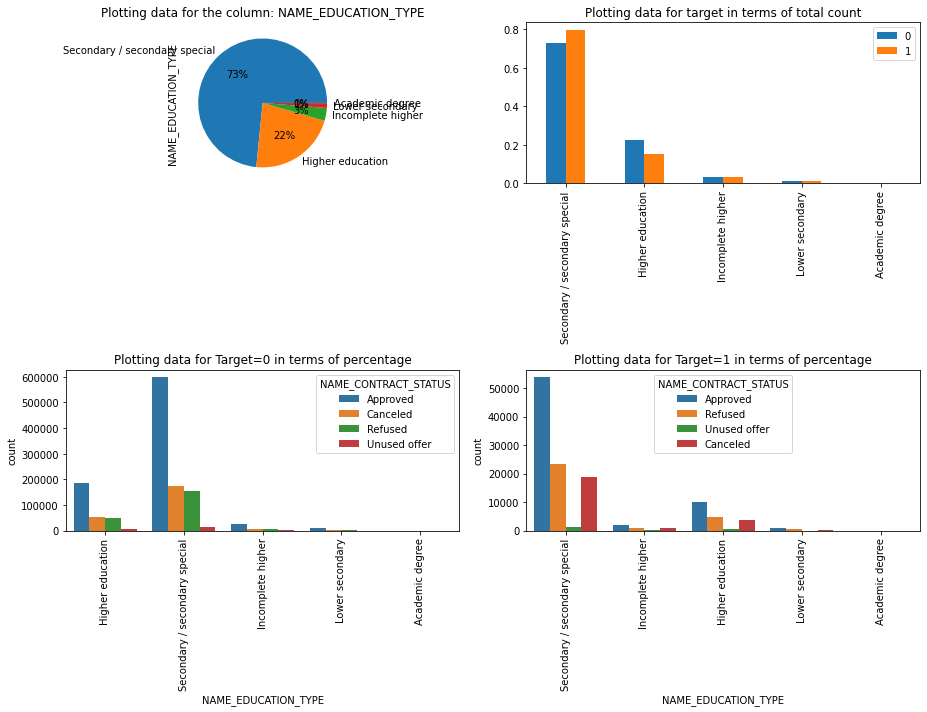

In [93]:
plotting('NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS')  

Above plot tells us that the person with secondary/secondary special education apply more for loan and their loan are also approved

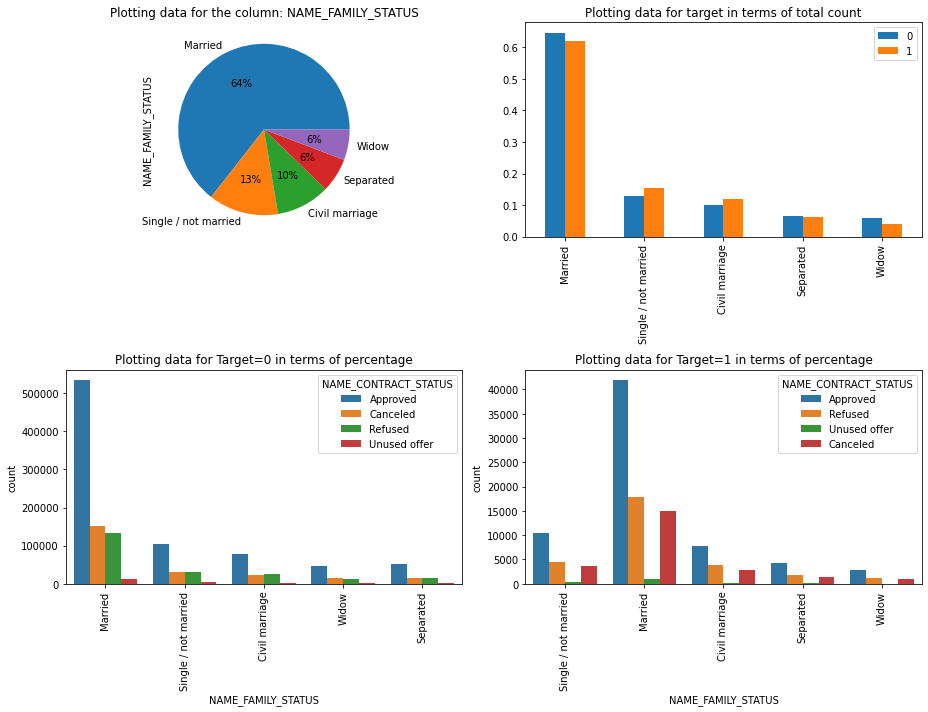

In [94]:
plotting('NAME_FAMILY_STATUS','NAME_CONTRACT_STATUS')    

Above plot tells us that married people apply more for loan, where as default rate in singles is higher than other

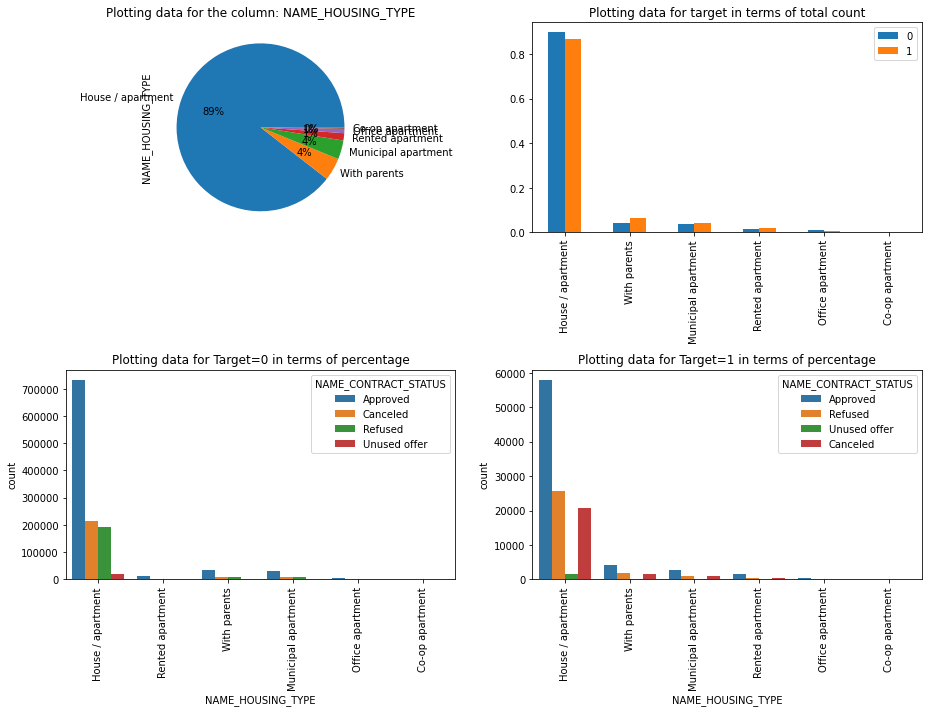

In [95]:
plotting('NAME_HOUSING_TYPE','NAME_CONTRACT_STATUS')   

People having their own apartments take more loan 

### Plotting: Organisation type

<AxesSubplot:ylabel='ORGANIZATION_TYPE'>

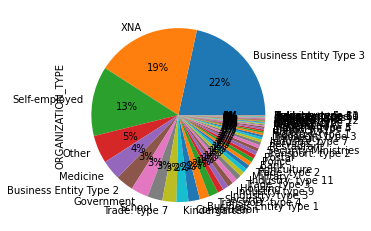

In [98]:
col = 'ORGANIZATION_TYPE'
previous_df[col].value_counts().plot.pie(autopct = "%1.0f%%")

<AxesSubplot:>

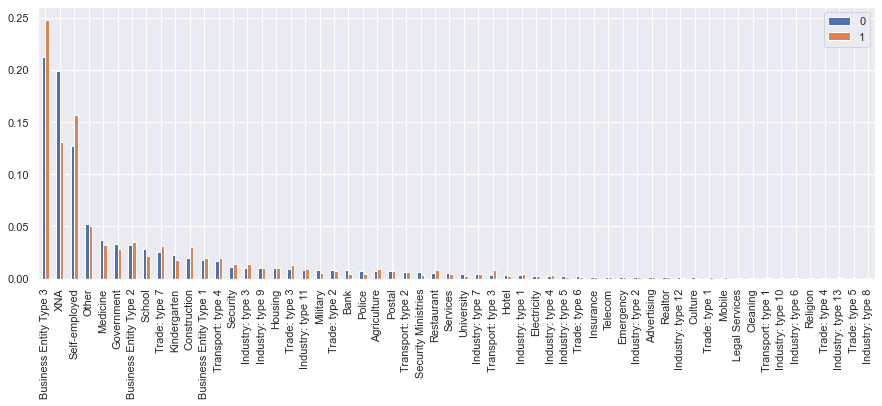

In [101]:
col = 'ORGANIZATION_TYPE'
dff = pd.DataFrame()
dff['0']= ((prev_df_0[col].value_counts())/len(prev_df_0))
dff['1']= ((prev_df_1[col].value_counts())/len(prev_df_1))
sns.set(rc={'figure.figsize':(15,5)})
dff.plot.bar()

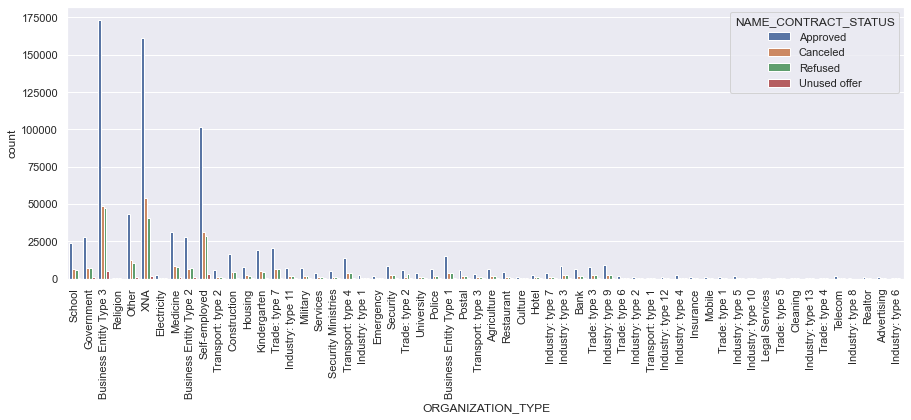

In [105]:
col = 'ORGANIZATION_TYPE'
hue = 'NAME_CONTRACT_STATUS'
sns.countplot(x=col, hue=hue, data=prev_df_0)
plt.xticks(rotation=90)
plt.show()

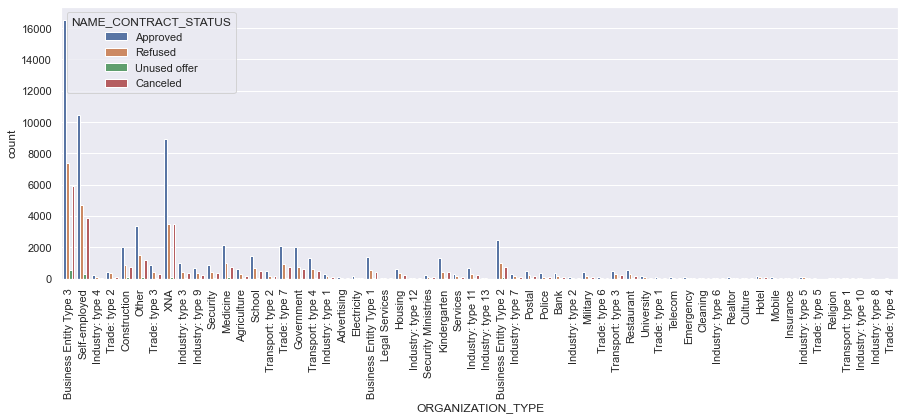

In [104]:
col = 'ORGANIZATION_TYPE'
hue = 'NAME_CONTRACT_STATUS'
sns.countplot(x=col, hue=hue, data=prev_df_1)
plt.xticks(rotation=90)
plt.show()

### we can see that business type 3 and self employed have maximum default rate